In [6]:
import re
def get_dfe_outputs(filename, t):
    with open(filename) as f:
        content = f.readlines()[0]
        return content
        match = re.search('0.000000 1.000000 (\d+.\d+) 1.000000 10.000000 (\d+.\d+) 10.000000 100.000000 (\d+.\d+) 100.000000 -99.000000 (\d+.\d+)', content)
#         with open(t+'_prop0-1.txt', 'a') as the_file:
#             the_file.write("{}\n".format(match.group(1)))
#         with open(t+'_prop1-10.txt', 'a') as the_file:
#             the_file.write("{}\n".format(match.group(2)))
#         with open(t+'_prop10-100.txt', 'a') as the_file:
#             the_file.write("{}\n".format(match.group(3)))
#         with open(t+'_prop100-.txt', 'a') as the_file:
#             the_file.write("{}\n".format(match.group(4)))
#         with open("main_file.txt", 'a') as the_file:
#             the_file.write("{}\n".format(match))


import os
rootdir = '/scratch/research/projects/chlamydomonas/network_evolution/analysis/dfe/random_bootstrap'
i = 0

file_out_random = open('dfe_outfile_random.csv', 'w')

for subdir, dirs, files in os.walk(rootdir):
    for folder in dirs:
        if folder.startswith("run"):
            file_out_random.write(get_dfe_outputs('/scratch/research/projects/chlamydomonas/network_evolution/analysis/dfe/random_bootstrap/' + folder + '/randomDFE.results.txt', "random"))

                        
# file_out_lower.close()

NameError: name 'file_out_lower' is not defined

In [2]:
with open('./random_prop0-1.txt') as f:
    upper_prop0_1 = [float(i) for i in f] 

with open('./random_prop1-10.txt') as f:
    upper_prop1_10 = [float(i) for i in f] 

with open('./random_prop10-100.txt') as f:
    upper_prop10_100 = [float(i) for i in f] 

with open('./random_prop100-.txt') as f:
    upper_prop100_ = [float(i) for i in f] 


FileNotFoundError: [Errno 2] No such file or directory: './upper_prop0-1.txt'

In [2]:
!pwd

/scratch/research/projects/chlamydomonas/network_evolution/analysis/dfe/bootstrap


[0.21142696039603961, 0.2354980693069307, 0.05563133663366336, 0.05412533663366337, 0.07180734653465345, 0.06811457425742574, 0.661134287128713, 0.6422620693069307]
[(0.2067022012119675, 0.21615171958011173), (0.23045324698965977, 0.24054289162420164), (0.052308343559471455, 0.05895432970785527), (0.050740515680276196, 0.05751015758705054), (0.06664184089080749, 0.07697285217849942), (0.06298201418178155, 0.07324713433306994), (0.6517240373011176, 0.6705445369563084), (0.6332967943973132, 0.6512273442165483)]


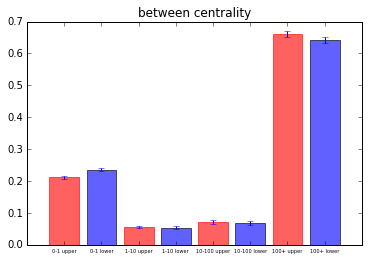

In [33]:
import matplotlib.pyplot as plt
import numpy as np, scipy.stats as st

# fig, axs = plt.subplots(3, 1, sharex=True)
# rough estimates of your means; replace by your actual values
means = [np.mean(upper_prop0_1), np.mean(lower_prop0_1), np.mean(upper_prop1_10), np.mean(lower_prop1_10), np.mean(upper_prop10_100), np.mean(lower_prop10_100), np.mean(upper_prop100_), np.mean(lower_prop100_)]
# the confidence intervals you provided
ci = [st.t.interval(0.95, len(upper_prop0_1)-1, loc=np.mean(upper_prop0_1), scale=st.sem(upper_prop0_1)), st.t.interval(0.95, len(lower_prop0_1)-1, loc=np.mean(lower_prop0_1), scale=st.sem(lower_prop0_1)), st.t.interval(0.95, len(upper_prop1_10)-1, loc=np.mean(upper_prop1_10), scale=st.sem(upper_prop1_10)), st.t.interval(0.95, len(lower_prop1_10)-1, loc=np.mean(lower_prop1_10), scale=st.sem(lower_prop1_10)), st.t.interval(0.95, len(upper_prop10_100)-1, loc=np.mean(upper_prop10_100), scale=st.sem(upper_prop10_100)), st.t.interval(0.95, len(lower_prop10_100)-1, loc=np.mean(lower_prop10_100), scale=st.sem(lower_prop10_100)), st.t.interval(0.95, len(upper_prop100_)-1, loc=np.mean(upper_prop100_), scale=st.sem(upper_prop100_)), st.t.interval(0.95, len(lower_prop100_)-1, loc=np.mean(lower_prop100_), scale=st.sem(lower_prop100_))]
print(means)
print(ci)
# get the range of the confidence interval
y_r = [means[i] - ci[i][1] for i in range(len(ci))]
barlist = plt.bar(range(len(means)), means, yerr=y_r, alpha=0.62, align='center')
barlist[0].set_color('r')
barlist[2].set_color('r')
barlist[4].set_color('r')
barlist[6].set_color('r')
plt.title("between centrality")
plt.xticks(fontsize=5)
plt.xticks(range(len(means)), ["0-1 upper", "0-1 lower", '1-10 upper', '1-10 lower', '10-100 upper', '10-100 lower', '100+ upper', '100+ lower'])
# plt.ylim([0.15, 0.3])
plt.savefig("between_centrality_props.pdf")
